In [1]:
cd ..

/home/luke/projects/CS6140-MatchingPursuit


In [2]:
%load_ext autoreload
%autoreload 2

In [23]:
from utils.dataset_utils import *
from utils.dictionary_generation import *
from utils.matching_pursuit import *
from utils.metrics import *

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.display import HTML


In [24]:
num_frames = 50

images = loadVideo("dataset/2011_09_26", num_frames)

In [25]:
# images = cropImages(images)

print("Num images: ", len(images))
print("Cropped Image size: ", np.shape(images[0]))

Num images:  50
Cropped Image size:  (512, 1392)


Num samples 500


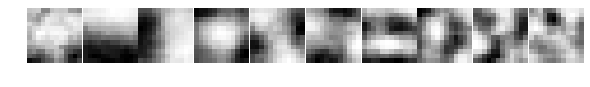

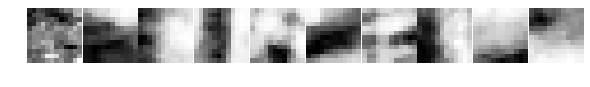

In [26]:
# Generate Dictionaries
patch_size = 12
num_samples = 500
num_features = 10
k = 1000

pca_features = generatePCADictionary(images, patch_size, num_samples, num_features)
optsparse_features = generateOptSparseDictionary(images, patch_size, num_samples, num_features)

plotDictionary(pca_features, "PCA")
plotDictionary(optsparse_features, "OptSparse")

In [27]:
# Run through whole video
S_codes_pca = videoMatchingPursuit(images, pca_features, k, orthogonalMatchingPursuit)
S_codes_optsparse = videoMatchingPursuit(images, optsparse_features, k, orthogonalMatchingPursuit)

recon_video_pca = generateReconVideo(S_codes_pca, images, pca_features)
recon_video_optsparse = generateReconVideo(S_codes_optsparse, images, optsparse_features)


In [28]:
# Plot the loss as a function of time
recon_loss_pca = videoReconstructionLoss(images, recon_video_pca)
recon_loss_optsparse = videoReconstructionLoss(images, recon_video_optsparse)

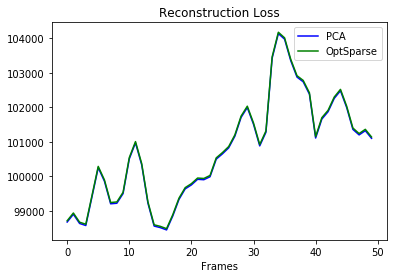

In [29]:
plt.plot(recon_loss_pca, "b", label="PCA")
plt.plot(recon_loss_optsparse, "g", label="OptSparse")
plt.xlabel("Frames")
plt.legend()
plt.title("Reconstruction Loss")
plt.show()

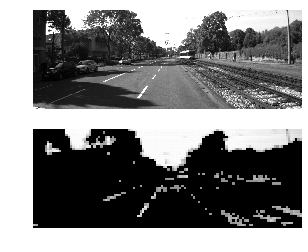

In [30]:
ani = compareVideos(images, recon_video_pca);
HTML(ani.to_html5_video())

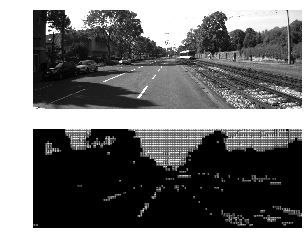

In [31]:
ani = compareVideos(images, recon_video_optsparse);
HTML(ani.to_html5_video())